# **New York Pretrial Release Prediction Problem Set Notebook for Legal Studies 123 (Data, Prediction, & Law)**

## **Introduction**

On January 1, 2020, [a new bail law](https://www.brennancenter.org/our-work/analysis-opinion/new-yorks-upcoming-bail-reform-changes-explained) restricting the circumstances under which pretrial detention and cash bail could be imposed went into effect in New York state. State legislators sought to lower the population of people who were jailed because they could not afford bail before their trial. While well-intentioned, the legislation received criticism from people across the political spectrum. A common concern was that crime would increase as a result of these changes, despite a lack of data to support this claim. Subsequent [reforms](https://www.brennancenter.org/our-work/analysis-opinion/new-yorks-latest-bail-law-changes-explained), which went into effect on July 1, 2020, broadened the situations under which cash bail could be set.

[Arraignments](https://colab.research.google.com/drive/1qYsW3AxhK1C0dC3So-6lxVRvVfWq1A_k#scrollTo=QvKhzwX1-wzh&line=5&uniqifier=1) are hearings where defendants are presented with and respond to the charges against them. This is also where presiding judges decide whether to detain them and set bail. In this problem set, we will be predicting and analyzing judge predictions of defendant flight risk at arraignment hearings. We will focus on the ROR_at_Arraign variable – which indicates whether or not the judge released the defendant on their own recognizance – in the provided dataset to be a representation of this. (Releasing someone on their own recognizance means they are released without having to post bail, which indicates that the judge believes you are not a flight risk and will likely return to court for your scheduled appearances). We are aiming to predict ROR_at_Arraign for this problem set because it is a more common outcome than being remanded to jail.

To do so, we will be using [pretrial release data](https://ww2.nycourts.gov/pretrial-release-data-33136). Note that the data extend through the end of 2022; they are updated biannually, and now separate New York City from upstate New York. This data is similar to the dataset used in Kleinberg et. al’s paper, “Human Decisions and Machine Predictions.”



- Following the roadmap of the Data Science Lifecycle while reflecting on ethical considerations.

- Cleaning messy publicly available data and documenting your process clearly.

- Applying and rationalizing different predictive modeling techniques for a given dataset.

- Evaluating the relative performance of different models and justifying the selection of a particular model.

- Comparing models against an external benchmark and contextualizing results.


The Data Science Lifecycle gives us a way to understand the workflow when building something like a prediction model using data. The lifecyle is not linear, in that at any point you may have to go back and reassess previous steps. This is an important part of building anything using data from the real world. In addition to using data to make a model that leads to "reports, decisions, and solutions," it is equally as pivotal to infuse ethical considerations into each step of the lifecycle. This includes questions about bias, discrimination, fairness, transparency, and more. In some cases it means asking questions about if your model should actually be made instead of how it should.

In building our judge decision model in this problem set, we will use the lifecycle to guide us.

## **The Data Science Lifecycle**
*Credit: Data 100 at XXX (university)*

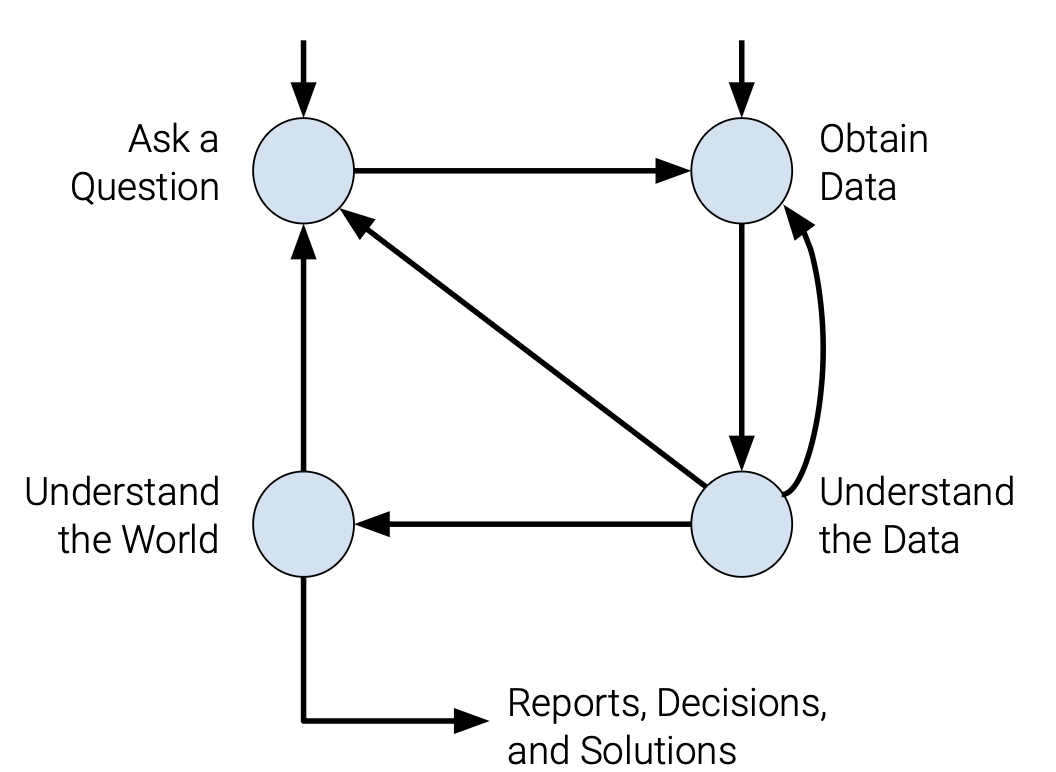

## **ASK A QUESTION – Question/ Problem Formulation**

**Our question:  Can we use a model to predict what decision a judge will make at arraignment? More specifically, can a model predict whether a judge will release a defendant on their own recognizance?**


This is a different question than Kleinberg et al., who are focused on calculating the supposed “risk” of an individual defendant using statistical methods. Kleinberg et al. ask, broadly: **Can machine learning improve human decision making?** in "[Human Decisions and Machine Predictions](https://www.nber.org/papers/w23180)," as they use pretrial release data to compare an algorithm's prediction of a released defendant's behavior (i.e., fleeing, committing another crime) to a judge's –– effectively replicating the calculation that a judge is required to make when deciding where a defendant will await trial.

As technology advances to the point where incredibly large datasets can be processed, applications of machine learning have sprawled across industries and systems – including the United States criminal justice system. Take the [COMPAS algorithm](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing), which used a machine learning model to compute "risk scores" for defendants, or predictive policing models – all of which have been used to augment human decision making, in turn having a direct impact on people's lives. Kleinberg et al. ultimately conclude that machine learning can improve judge decision making, i.e. what they decide to do with the defendant at the time of their arraignment.

(a) What stakeholders are implicated by the question that Kleinberg et al. are asking/ the problem they are trying to solve? (ex: judges, defendants, law enforcement, etc.). Compare this to the stakeholders that are implicated by the question we are asking. *Consider how Kleinberg et al. are framing the use of data science itself – as a supplement or replacement to human decision making – versus how we are framing it.*

(b) Though Kleinberg et al. are NOT suggesting this, think about a world where a machine learning or predictive model replaced the labor of human judges. Do you think this would be a good idea? Who would be impacted by this automation?

## **OBTAIN DATA – Data Acquisition**

The data-generating process–– that is, why and how data was collected–– has implications for how we approach the data and what we do with it. Along with the bail policy changes, the first iteration of the law was accompanied by a mandate to collect the [pretrial release data](https://ww2.nycourts.gov/pretrial-release-data-33136) (which we are using for this problem set).

(a) How should the context in which this data was produced impact the way we understand it - from data cleaning to modeling? (Think about where the data came from, who produced it, and for what purpose.)

(b) Take a look at the [documentation](https://www.nycourts.gov/legacypdfs/court-research/Pretrial%20Release%20Data%20documentation-%20for%20website.pdf) of this dataset. Is it transparent?

## **UNDERSTAND THE DATA – Exploratory Data Analysis & Visualization**

#### **Data Cleaning and Exploratory Data Analysis**

In [ ]:
#Import the necessary packages.

import numpy as np
import scipy
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score

from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
# Load the dataset.

  # (a) Download the CSV from DCJS website.
  # (b) Upload the CSV into your Google Drive
  # (c) Mount your Google Drive to this Google Colab notebook (i.e., grant it access to your files).
  # (d) Read the CSV in using pd.read_csv with the file path name from your Google Drive.

# YOUR CODE HERE

(a) **Leakage**. Leakage is a term used in machine learning for when a model makes decisions using information that it would not actually have, resulting in unnaturally high performance. What would leakage look like in the context of this problem and dataset? *Hint: think about the entire criminal sentencing process (and what happens before and after arraignment).*

*Provide a short explanation of your choices here:* ...


(i) Inspect the features in the dataset and their associated descriptions in the documentation. List the ones that must be removed to prevent data leakage.

*Provide a bulleted list of the features here:*

- ...
- ...

    ...
    
- ...


In [ ]:
#Drop the columns above.
#YOUR CODE HERE

(b) **Missing values.**

Read this article on the importance of missing values in machine learning tasks: “[Missing the missing values: The ugly duckling of fairness in machine learning](https://onlinelibrary.wiley.com/doi/10.1002/int.22415?af=R).” Then, reflect:

(i) Which features have the greatest proportion of missing values? Why do you think that is (think about the data collection process, the meaning of and representation of each feature, etc.)?

In [ ]:
#Use a pandas function to find the proportion of missing values for each feature.
# YOUR CODE HERE

In [ ]:
#Decide how to deal with missing values based on your observations above.

#Impute columns of your choice with 0.
#Hint: You should impute NaNs with 0 for features where having 0 of something would significant to a judge.
#YOUR CODE HERE

# Create a function that replace NaN values for a list of variables, like those above, with an imputed value in a df.
#YOUR CODE HERE

# Call the function on the columns that need 0s instead of NaNs.
#YOUR CODE HERE

(ii) How will our decision about how we deal with missing values (i.e. dropping them altogether, replacing them with 0s, etc.) ultimately impact our model – not just in terms of accuracy, but in terms of fairness?

*Provide a discussion here ...*

(c) **Exploring the features.**
In working with a dataset about the criminal justice system, we might be interested in exploring the demographics of people represented. In order to model, we are also interested in exploring the relative frequencies of values for each of the categorical variables. Creating visualizations and finding summary statistics is a great way to gain a better understanding of this.

*Note on vizualization libraries:* You can either use plotly express (documentation [here](https://plotly.com/python/plotly-express/)) or matplotlib (documentation [here](https://matplotlib.org/)) to create your visualizations. Plotly express allows for "interactive" visualizations, such as hovering. There is not much of a difference for our purposes, so use whichever one you feel more comfortable with.

(i) How many people from each racial category are represented in the dataset? How about each gender category?

In [ ]:
#Group the dataframe by racial category and create a bar chart.
#YOUR CODE HERE

In [ ]:
#Group the dataframe by gender category and create a bar chart.
#YOUR CODE HERE

(ii) How many people from each decision category are represented in this dataset (that is, how many records of each outcome)? How does the breakdown of race and gender differ for each outcome?

In [ ]:
#Find the percentage of the total for each of the outcomes at arraignment.
#Note: ROR = release on recognizance

#YOUR CODE HERE

In [ ]:
#Group the dataframe by decision category and create a bar chart.

#YOUR CODE HERE

In [ ]:
#Group the dataframe by decision category and race and create a bar chart.

#YOUR CODE HERE

In [ ]:
#Group the dataframe by decision category and gender and create a bar chart.

#YOUR CODE HERE

#### **Adapting Our Dataset to Our Prediction Task**



(c) **Time frame**. What should the timeframe of the dataset be if we’re interested in model predictions under the revised statute that reinstituted opportunities for cash bail? How do you address this in your data cleaning?

*Provide an explanation of your method here: ...*

In [ ]:
#Filter the dataframe to fit the timeframe requirements. Hint: add an indicator for pre and post reform -- don't throw away data when you don't have to!

#Convert arraign date to datetime format
#YOUR CODE HERE

#Create indicator which is 0 for pre-rollback (i.e., pre July 2020) and 1 for post-rollback (i.e., post July 2020)
#YOUR CODE HERE

(b) **Categorical variables**. In order to use categorical variables in a modeling task, they must be transformed using the process of one-hot encoding. Identify these features and perform one-hot encoding.

In [ ]:
#Use the pandas nunique function to see how many unique values are contained in each column -- it is probably not the best idea to one-hot encode the columns that have hundreds (or even thousands) of unique values, because the dimensionality of our data will get too huge!
#YOUR CODE HERE

In [ ]:
#One-hot encode the categorical columns that we want to include in our analysis, i.e. turn them into a binary 0/1 format so that they can be used as features in a model.
#Hint: https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
#You will run into issues if you try to one hot encode every single categorical variable, simply because the memory on this notebook cannot handle it. (Think of, for example, how many unique judges there are in the New York court system –– a lot!) So, choose wisely.
#You can revisit one-hot encoding after the Feature Selection portion.

#YOUR CODE HERE

In [ ]:
#Standardize boolean features to all be 0/1.
#YOUR CODE HERE

(i) Notice that `Age_at_Crime` and `Age_at_Arrest` are two of the only numerical variables in our dataset. Investigate these two variables further by creating a histogram of both `Age_at_Crime` and `Age_at_Arrest`. Then, reflect on and deal with missing values for these two variables.

In [ ]:
#Create histograms of Age_at_Crime and Age_at_Arrest

#YOUR CODE HERE

Oh dear! Looks like Age_at_Crime and Age_at_Arrest have missing values encoded as 0. We should therefore be cautious about using these features unless we drop the zero values. We may wish to keep only one, like 'Age_at_Crime' and drop the records where that is 0.This is a good example of the iterative process of the lifecycle. Here, after we have started adapting to our prediction task, we see that we must return to data cleaning after noticing new information about missing values.

*Provide a written reflection on how and why values are missing for the age variables:* ....


In [ ]:
#Deal with missing age values (i.e. drop, impute, etc.)
#Hint: Drop Age_at_Arrest, and drop the rows that encode Age_at_Crime as 0.

#YOUR CODE HERE

#### **Feature Selection**

Feature selection, by which we reduce our dataset down to what are deemed the most important features in order to embark on our prediction task, is a pivotal part of any machine learning task. Given what we understand about the criminal justice system, we could select the features that we deem most important to train our model on. We could also use feature selection techniques such as the correlation coefficient, which measures the correlation between each feature in our dataset to the variable we are trying to predict.

Feature selection, by which we reduce our dataset down to what are deemed the most important features in order to embark on our prediction task, is a pivotal part of any machine learning task. Given what we understand about the criminal justice system, we could select the features that we deem most important to train our model on. We could also use feature selection techniques such as the correlation coefficient, which measures the correlation between each feature in our dataset to the variable we are trying to predict.

(a) The New York Criminal Justice Agency published [a study](https://www.nycja.org/assets/Updating-the-NYC-Criminal-Justice-Agency-Release-Assessment-Final-Report-June-2020.pdf) where they used a similar dataset to determine which features had the most power for predicting whether a defendant would fail to appear or not. This study was ultimately used to create a ["Release Assessment" tool](https://www.nycja.org/release-assessment) indended to help judges make decisions at the time of arraignment. Judges can plug in a defendant's information into the eight factors that the study deemed were most important:
1. Years since last bench warrant?
2. Two or more bench warrants in last five years? (Y/N)
3. Misdemeanor convictions in the last year? (Y/N)
4. Number of misdemeanor convictions in last three years?
5. Number of felony convictions in last ten years?
6. Number of pending cases?
7. Years living at last two addresses?
8. Reachable by phone? (Y/N)

Under this assessment system, each defendant begins with 25 points, which are deducted according to where they fall within each of these eight features. The score is then used to give a judge a reccomendation on whether to release them on their own recognizance or not.

*(Note that in this problem set, we are not building a model that predicts whether or not a defendant will fail to appear in court or not, but rather to predict judge decisions themselves).*

(i) What do you think are the potential pitfalls of using a release assessment algorithm in the judge decision-making process?

*Provide response here:* ...

(ii) No feature in our dataset that indicates if a judge relied on the assessment tool to make their decision. What is the problem with this?

*Provide response here: ...*

(iii) What metrics of success did the study's authors use to assess their predictions?

*Provide response here: ...*

(iv) Built into this tool is the assumption that defendants under similar circumstances will behave the same way/ have the same outcome. What is the problem with this – and how does it fit into the larger discussion about human decision-making versus decision-making through ML models?

*Provide response here: ...*

(b) Create a correlation matrix to find which features are most highly correlated with being released on the defendants’ own recognizance at the time of arraignment. What features are most highly correlated? Why do you think that is?

In [ ]:
#Use the pandas unique function to see how many unique values are contained in each column -- it is probably not the best idea to one-hot encode the columns that have hundreds (or even thousands) of unique values, because the dimensionality of our data will get too huge!

#YOUR CODE HERE

In [ ]:
#Create a correlation matrix here of each of our features with the ROR_at_Arraign outcome.
#Reminder that a correlation matrix shows the correlation coefficient (scale from -1 to 1) of each of our features with the outcome variable and with each other.
#Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

#YOUR CODE HERE

*Provide an explanation of your correlation matrix here: ...*

(c) Are any “protected classes” (i.e. race, gender, etc.) included in the most highly correlated features? Should they be included in our model? Why or why not?

*Provide response here: ...*

## **UNDERSTAND THE WORLD – Prediction & Inference**

#### **Modeling, Prediction, and Performance Metrics**

(a) Partition the dataset into a training, test, and validation set.

In [ ]:
#Drop the column that we are trying to predict
#YOUR CODE HERE

#Target variable - judge decision that we are trying to predict
#YOUR CODE HERE

#Set the random seed
#YOUR CODE HERE

#Split the data
#Hint: train_test_split returns 4 values: X_train, X_test, y_train, y_test
#YOUR CODE HERE

# split the data
#Hint: train_test_split returns 4 values: X_train, X_validate, y_train, y_validate
#YOUR CODE HERE

(b) Choose three different prediction techniques that are appropriate to the problem at hand. Describe the basic mechanism of each, benefits and drawbacks, and any other criteria you factored into your decision. Why is each a reasonable choice in this context.
*Hint: take a look at the different techniques and justifications in the classification labs.*

*Provide response here: ...*


(c) Create 3 models and report their accuracy as well as a false-positive/ false-negative rates through an [AUC-ROC curve](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5) and a confusion matrix (note that this is one way of measuring the performance of our model – it gives us a sense of the metrics of recall, precision, specificity, and accuracy). There are [many definitions of fairness](https://arxiv.org/abs/1811.07867), which are largely based on the context of our question and what we value in our solution. Consider that your choice of model has implications on your ability to explain how it works; for example, a [logistic regression model](https://uu.diva-portal.org/smash/get/diva2:1459136/FULLTEXT01.pdf) is by nature more "explainable" than a more black-box method like random forests.

The modeling stage is where many important decisions are made, and assumptions – and sometimes [bias](https://compass.onlinelibrary.wiley.com/doi/full/10.1111/phc3.12760) – encoded. It is important that we establish how we are going to evaluate our model, making sure to take into account questions of transparency, bias and fairness in addition to traditional concerns of accuracy.

**Model 1 -- Logistic Regression**

In [ ]:
#Model 1 -- Logistic Regression

#Initialize the model.
#YOUR CODE HERE

#Fit the model using the training set.
#YOUR CODE HERE

#Make predictions on the test set.
#YOUR CODE HERE

#Check the model's accuracy score. See: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

# Accuracy score on validation data.
#YOUR CODE HERE

# Accuracy score on test data.
#YOUR CODE HERE


In [ ]:
#Create a confusion matrix for the logistic regression model.
#YOUR CODE HERE

#Plot the confusion matrix.
#YOUR CODE HERE

In [ ]:
#Create an AUC-ROC curve for the logistic regression model.
#YOUR CODE HERE

**Model 2 -- Decision Tree Classifier**

In [ ]:
#Model 2 -- Decision Tree Classifier

#Initialize the model.
#YOUR CODE HERE

#Fit the model using the training set.
#YOUR CODE HERE

#Make predictions on the test set.
#YOUR CODE HERE

#Check the model's accuracy score. See: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

# Accuracy score on validation data.
#YOUR CODE HERE

# Accuracy score on test data.
#YOUR CODE HERE


In [ ]:
#Create a confusion matrix for the decision tree model.
#YOUR CODE HERE
#Plot the confusion matrix.
#YOUR CODE HERE

In [ ]:
#Create an AUC-ROC curve for the decision tree model.
#YOUR CODE HERE

**Model 3 -- Random Forest Classifier**

In [ ]:
#Model 3 -- Random Forest Classifier

#Initialize the model.
#YOUR CODE HERE

#Fit the model using the training set.
#YOUR CODE HERE

#Make predictions on the test set.
#YOUR CODE HERE

#Check the model's accuracy score. See: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

# Accuracy score on validation data.
#YOUR CODE HERE

# Accuracy score on test data.
#YOUR CODE HERE

In [ ]:
#Create a confusion matrix for the random forest model.
#YOUR CODE HERE
#Plot the confusion matrix.
#YOUR CODE HERE

In [ ]:
#Create an AUC-ROC curve for the random forest model.
#YOUR CODE HERE

(d) Choose one of the three models you created and report the top 10 features with the most predictive value. Use Pandas `coef_` or `feature_importances_`, depending on which model you pick. Then, provide a brief discussion on your interpretation of the most important features.

In [ ]:
#Use a pandas function to get the most important features.
#YOUR CODE HERE

*Discussion of most important features: ...*


#### **Interpretability**

(a) Create a dataframe that can be used to analyze your model’s performance, especially relative to judges. This should contain (1) all the features the model was trained on, (2) the judge’s arraignment release decision, (3) the probability score of the data point computed by the model, and (4) the model’s ultimate prediction.

In [ ]:
#Find the probability score of the data point computed by the model.
#Hint: use pandas predict_proba function, and remember which portion of the dataset you should be running this on.
#YOUR CODE HERE

In [ ]:
#Construct a dataset that includes all the features, the judge's actual decisions, the predict_probas, and the model's predictions.
#YOUR CODE HERE

#### **Evaluate the Model Further**

Choose one model out of the three you created above. We want a way to compare this model to actual judge decisions, specifically focusing on different demographic groups. Because our data is a product of the criminal justice system – which disproportionately arrests and incarcerates Black men – it is within our interest to examine how our model performs, and if there are any differences, between racial groups.

(a) Compute the average judge decision, model probability score, and model prediction for 1) all cases, 2) cases with black defendants, 3) cases with non-black defendants, 4) cases with male defendants, 5) cases with non-male defendants, 6) cases with defendants at or above the median age, and 7) cases with defendants below the median age. What do you observe about race, gender, and age differences for these scores? Include visualizations to help your audience understand the group differences.

*(Remember, the average in this context means the proportion of 1s, or in other words, the proportion of defendants of a given demographic group that a judge released on their own recognizance.)*

In [ ]:
#1) All cases
#YOUR CODE HERE

In [ ]:
#2) Cases with Black defendants
#YOUR CODE HERE

In [ ]:
#3) Cases with non-Black defendants
#YOUR CODE HERE

In [ ]:
#4) Cases with male defendants
#YOUR CODE HERE

In [ ]:
#5) Cases with non-male defendants
#YOUR CODE HERE

In [ ]:
#6) Cases with defendants at or above the median age
#YOUR CODE HERE

In [ ]:
#7) Cases with defendants below the median age
#YOUR CODE HERE

In [ ]:
#Create a dataframe with the judge predictions for all of the 7 demographic groups.
#YOUR CODE HERE
#Create a bar chart showing the probability score per demographic group.
#YOUR CODE HERE

In [ ]:
#Create a dataframe with the probability score for all of the 7 demographic groups.
#YOUR CODE HERE
#Create a bar chart showing the probability score per demographic group.
#YOUR CODE HERE

In [ ]:
#Create a dataframe with the model predictions for all of the 7 demographic groups.
#YOUR CODE HERE
#Create a bar chart showing the average model prediction per demographic group.
#YOUR CODE HERE

## **Final Reflection Questions**

1. What have you learned about the Data Science Lifecycle throughout this problem set? Are there any ethical considerations that remain unsolved?

    *Provide response here: ...*

    

2. This [paper](https://dl.acm.org/doi/pdf/10.1145/3351095.3372859) suggests that models like the one you made in this problem set – which aim to make predictions about judge decision making instead of about defendants themselves – is a form of studying the power structure as a whole. Reflect.

    *Provide response here: ...*



3. Imagine that you are a data scientist in an agency hired to assess judge decision making in New York, given the pretrial release dataset. What insights have you gleaned from the process of making a model that predicts a judge's decision to release someone on their own recognizance or not? Is there anything you would have done differently (i.e. with cleaning the data, the choice of model, etc.) and why?

    *Provide response here: ...*

  

4.	As Kleinberg et al. noted, criminal court judges in New York City are able to avail themselves of a risk assessment algorithm (which is designed to predict risk of non-appearance, which is the "official" reason for a judge to assign bail). The risk assessment algorithm is from an NGO, the [New York City Criminal Justice Agency](https://www.nycja.org/). The NGO does an intake interview and creates a simple [risk assessment](https://www.nycja.org/ra-court-forms) that is then reported to the judge, who may or may not take it into consideration in making the pretrial release decision. How do the predictive features you found align with those in the Criminal Justice Agency's algorithm? What additional data does the CJA have that you do not, and why do think those additional items are good predictors of appearance post-arraignment?

    *Provide response here: ...*